In [23]:
%matplotlib inline
# Import ica function
from ica import ica1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Define matrix dimensions
Nobs = 10 # Number of observations
Nvars = 10000 # Number of variables
Ncomp = 2 # Number of components

font = 30

Step 74: Lrate 8.5e-06,Wchange 6.0e-07,Angle 110.59


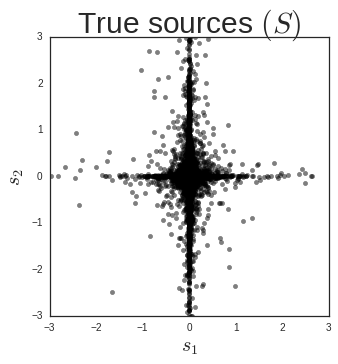

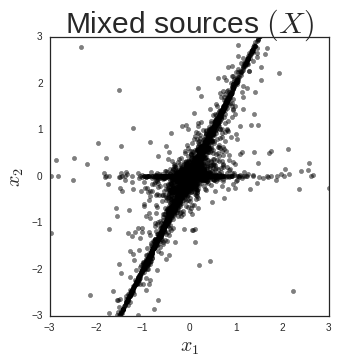

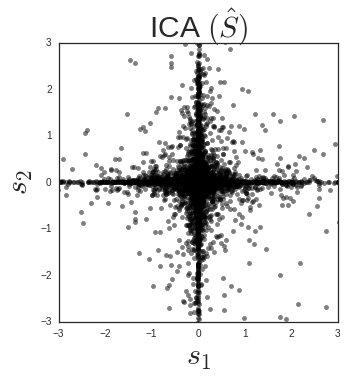

In [28]:
# Simulated true sources
np.random.seed(66)
#rng = np.random.RandomState(42)
#S_true = rng.standard_t(1.5, size=(Ncomp, Nvars))
#S_true = S_true[:, np.logical_and(np.abs(S_true[0,:])<3, np.abs(S_true[1,:])<3)]
S_true = np.random.logistic(0,1,(Ncomp,Nvars))**3
#S_true = np.random.standard_t(1,(Ncomp,Nvars))
S_true = S_true/ S_true.std()
S_true[0, :] /= 4.

# Simulated true mixing
#A_true = np.random.normal(0,1,(Nobs,Ncomp))
A_true = np.array([[1,1],[0,2]])
# X = AS
X = np.dot(A_true,S_true)
# add some noise
#X = X + np.random.normal(0,1,X.shape)

sns.set_style("white")
plt.figure(figsize=(5,5))
df = pd.DataFrame(S_true.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=20)
plt.ylabel("$s_2$", fontsize=20)
plt.title('True sources $(S)$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/independent_sources.pdf')
plt.figure(figsize=(5,5))
df = pd.DataFrame(X.T[:,:2], columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title('Mixed sources $(X)$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/mixed_sources.pdf')

from sklearn.decomposition import FastICA
A, S_pred, _ = ica1(X,2)
S_pred=S_pred.T
temp = np.copy(S_pred)
S_pred[:,0] = temp[:,1]
S_pred[:,1] = temp[:,0]

# S_pred = clf.transform(X.T)
S_pred = S_pred/S_pred.std()
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.figure(figsize=(5,5))
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('ICA $(\hat{S})$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/estimated_sources.pdf')

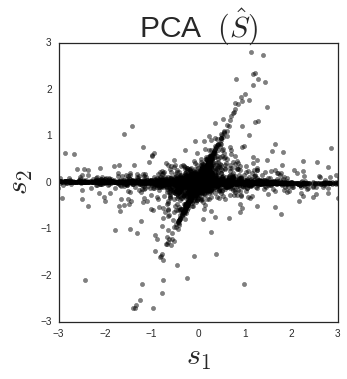

In [27]:
# angle = np.pi/6
# A_true = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
X = np.dot(A_true,S_true)

clf = PCA()
clf.fit(X.T)
S_pred = clf.transform(X.T)

plt.figure(figsize=(5,5))
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('PCA  $(\hat{S})$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pcaonica_estimated_sources.pdf')

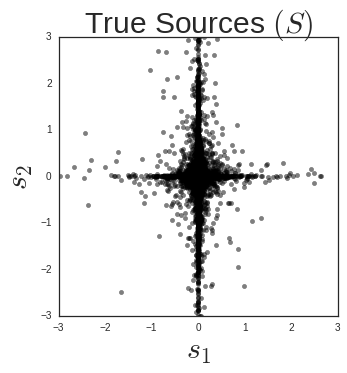

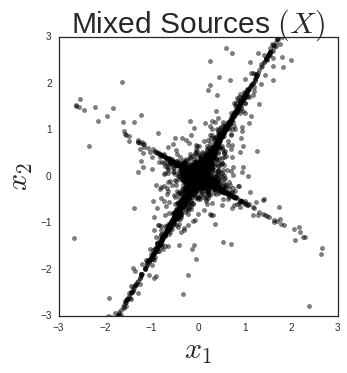

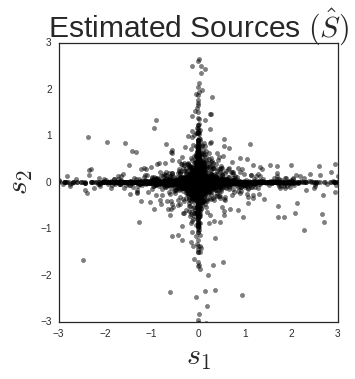

In [30]:
angle = np.pi/6
A_true = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
X = np.dot(A_true,S_true)
from sklearn.decomposition import PCA

clf = PCA()
clf.fit(X.T)
S_pred = clf.transform(X.T)

sns.set_style("white")
plt.figure(figsize=(5,5))
df = pd.DataFrame(S_true.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('True Sources $(S)$', fontsize=font)
plt.axes().set_aspect('equal', 'datalim')
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_true_sources.pdf')

plt.figure(figsize=(5,5))
df = pd.DataFrame(X.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$x_1$", fontsize=font)
plt.ylabel("$x_2$", fontsize=font)
plt.title('Mixed Sources $(X)$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_mixed_sources.pdf')

plt.figure(figsize=(5,5))
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('Estimated Sources $(\hat{S})$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_estimated_sources.pdf')

(200, 10000)
Step 68: Lrate 1.0e-05,Wchange 4.2e-07,Angle 124.24


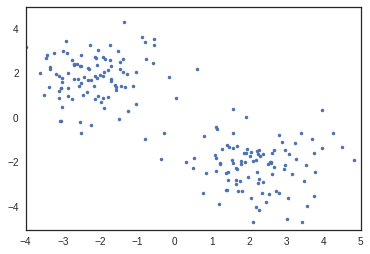

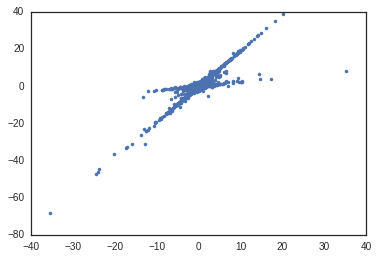

In [48]:
A0 = np.random.multivariate_normal([-2,2],np.eye(2),100)
A1 = np.random.multivariate_normal([2,-2],np.eye(2),100)

A = np.vstack((A0,A1)) 

plt.plot(A[:,0], A[:,1],'.')

X = np.dot(A,S_true)
print(X.shape)

A_pred, S_pred, W = ica1(X,2)

plt.figure()
plt.plot(X[0,:],X[1,:],'.')

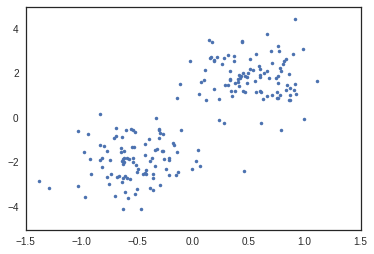

In [46]:
plt.plot(A_pred[:,0], A_pred[:,1],'.')
